In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [2]:
df= pd.read_csv('GDP.csv')

In [3]:
df.head(5)

,Country,GDP_2020,GDP_2021,GDP_2022,GDP_2023,GDP_2024,GDP_2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [3]:
df['Average GDP'] = df[['GDP_2020','GDP_2021','GDP_2022','GDP_2023','GDP_2024','GDP_2025']].mean(axis=1).round(2)

In [5]:
df.head(5)

,Country,GDP_2020,GDP_2021,GDP_2022,GDP_2023,GDP_2024,GDP_2025,Average GDP
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN,16540.75
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,21926.83
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,226320.00
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,3574.17
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,105398.50


In [29]:
gdp_cols_to_check = ['GDP_2020', 'GDP_2021', 'GDP_2022', 'GDP_2023', 'GDP_2024', 'GDP_2025']
for col in gdp_cols_to_check:
    df.loc[df[col].isna(), col] = df['Average GDP']

In [7]:
df.head(5)

,Country,GDP_2020,GDP_2021,GDP_2022,GDP_2023,GDP_2024,GDP_2025,Average GDP
0,Afghanistan,20136,14278.0,14501.0,17248.0,16540.75,16540.75,16540.75
1,Albania,15271,18086.0,19185.0,23388.0,27259.00,28372.00,21926.83
2,Algeria,164774,185850.0,225709.0,247789.0,264913.00,268885.00,226320.00
3,Andorra,2885,3325.0,3376.0,3786.0,4038.00,4035.00,3574.17
4,Angola,66521,84375.0,142442.0,109764.0,115946.00,113343.00,105398.50


In [30]:
df_long = df.melt(
    id_vars=['Country'], 
    value_vars=[col for col in df.columns if col.startswith("GDP_")],
    var_name='Year', 
    value_name='GDP'
)

# Remove "GDP_" prefix to keep year only
df_long['Year'] = df_long['Year'].str.replace("GDP_", "")

# Convert to numeric (optional but recommended)
df_long['Year'] = df_long['Year'].astype(int)

df_long


,Country,Year,GDP
0,Afghanistan,2020,20136.00
1,Albania,2020,15271.00
2,Algeria,2020,164774.00
3,Andorra,2020,2885.00
4,Angola,2020,66521.00
...,...,...,...
1171,Vietnam,2025,490970.00
1172,Palestine,2025,17663.75
1173,Yemen,2025,17401.00
1174,Zambia,2025,28910.00


In [31]:
df_long = df_long.merge(df[['Country', 'Average GDP']], on='Country', how='left')

In [8]:
df_long

,Country,Year,GDP,Average GDP
0,Afghanistan,2020,20136.00,16540.75
1,Albania,2020,15271.00,21926.83
2,Algeria,2020,164774.00,226320.00
3,Andorra,2020,2885.00,3574.17
4,Angola,2020,66521.00,105398.50
...,...,...,...,...
1171,Vietnam,2025,490970.00,418484.00
1172,Palestine,2025,17663.75,17663.75
1173,Yemen,2025,17401.00,19843.67
1174,Zambia,2025,28910.00,25368.67


In [32]:
df_long['GDP'] = df_long['GDP'].round(2)

In [33]:
df_long

,Country,Year,GDP,Average GDP
0,Afghanistan,2020,20136.00,16540.75
1,Albania,2020,15271.00,21926.83
2,Algeria,2020,164774.00,226320.00
3,Andorra,2020,2885.00,3574.17
4,Angola,2020,66521.00,105398.50
...,...,...,...,...
1171,Vietnam,2025,490970.00,418484.00
1172,Palestine,2025,17663.75,17663.75
1173,Yemen,2025,17401.00,19843.67
1174,Zambia,2025,28910.00,25368.67


In [34]:
def add_countrywise_cagr(df_long, gdp_col='GDP', start_year=2020, end_year=2025):
    
    n_years = end_year - start_year
    cagr_dict = {}
    
    for country, group in df_long.groupby('Country'):
        gdp_start = group.loc[group['Year'] == start_year, gdp_col].sum()
        gdp_end = group.loc[group['Year'] == end_year, gdp_col].sum()
        
        if gdp_start > 0:
            cagr = (gdp_end / gdp_start) ** (1/n_years) - 1
            cagr_dict[country] = f"{cagr*100:.2f}%"
        else:
            cagr_dict[country] = None
    
    # Map CAGR back to all rows
    df_long['CAGR_Percentage'] = df_long['Country'].map(cagr_dict)
    
    return df_long
df_long = add_countrywise_cagr(df_long, gdp_col='GDP', start_year=2020, end_year=2025)

In [35]:
df_long

,Country,Year,GDP,Average GDP,CAGR_Percentage
0,Afghanistan,2020,20136.00,16540.75,-3.86%
1,Albania,2020,15271.00,21926.83,13.19%
2,Algeria,2020,164774.00,226320.00,10.29%
3,Andorra,2020,2885.00,3574.17,6.94%
4,Angola,2020,66521.00,105398.50,11.25%
...,...,...,...,...,...
1171,Vietnam,2025,490970.00,418484.00,7.23%
1172,Palestine,2025,17663.75,17663.75,2.61%
1173,Yemen,2025,17401.00,19843.67,-2.96%
1174,Zambia,2025,28910.00,25368.67,9.77%


In [36]:
def overall_cagr(df, start_year=2020, end_year=2025):
    gdp_start = df[df['Year'] == start_year]['GDP'].sum()
    gdp_end = df[df['Year'] == end_year]['GDP'].sum()

    years = end_year - start_year

    cagr = (gdp_end / gdp_start) ** (1 / years) - 1
    return f"{cagr * 100:.2f}%"

overall_cagr_value = overall_cagr(df_long)

In [37]:
overall_cagr_value

'5.80%'

In [38]:
def add_countrywise_gdp_growth(df_long, gdp_col='GDP', start_year=2020, end_year=2025):
    
    growth_dict = {}
    
    for country, group in df_long.groupby('Country'):
        gdp_start = group.loc[group['Year'] == start_year, gdp_col].sum()
        gdp_end = group.loc[group['Year'] == end_year, gdp_col].sum()
        
        if gdp_start > 0:
            growth = (gdp_end - gdp_start) / gdp_start * 100
            growth_dict[country] = f"{growth:.2f}%"
        else:
            growth_dict[country] = None
    
    # Map growth percentage to the dataframe
    df_long['GDP_Growth_Percentage'] = df_long['Country'].map(growth_dict)
    
    return df_long


In [45]:
df_long = add_countrywise_gdp_growth(df_long, gdp_col='GDP', start_year=2020, end_year=2025)

In [46]:
df_long

,Country,Year,GDP,Average GDP,CAGR_Percentage,GDP_Growth_Percentage
0,Afghanistan,2020,20136.00,16540.75,-3.86%,-17.85%
1,Albania,2020,15271.00,21926.83,13.19%,85.79%
2,Algeria,2020,164774.00,226320.00,10.29%,63.18%
3,Andorra,2020,2885.00,3574.17,6.94%,39.86%
4,Angola,2020,66521.00,105398.50,11.25%,70.39%
...,...,...,...,...,...,...
1171,Vietnam,2025,490970.00,418484.00,7.23%,41.77%
1172,Palestine,2025,17663.75,17663.75,2.61%,13.72%
1173,Yemen,2025,17401.00,19843.67,-2.96%,-13.94%
1174,Zambia,2025,28910.00,25368.67,9.77%,59.39%


In [47]:
def overall_gdp_growth(df_long, gdp_col='GDP', start_year=2020, end_year=2025):
    
    total_start = df_long.loc[df_long['Year'] == start_year, gdp_col].sum()
    total_end = df_long.loc[df_long['Year'] == end_year, gdp_col].sum()
    
    if total_start > 0:
        growth = ((total_end - total_start) / total_start) * 100
        return f"{growth:.2f}%"
    else:
        return None
overall_gdp_growth = calculate_overall_gdp_growth(df_long, gdp_col='GDP', start_year=2020, end_year=2025)

In [48]:
overall_gdp_growth

'32.58%'

In [19]:
GDP_2025 = df_long.loc[df_long['Year']==2025,'GDP'].sum()
GDP_2025 = float(GDP_2025)

In [22]:
GDP_2025

113791193.5

In [23]:
top5_countries = (
    df_long[['Country', 'Average GDP']]
    .drop_duplicates()
    .nlargest(5, 'Average GDP')
    .reset_index(drop=True)   
)

In [24]:
top5_countries

,Country,Average GDP
0,United States,26409173.67
1,China,17975340.17
2,Japan,4463528.67
3,Germany,4397564.67
4,India,3487139.00


In [49]:
# Clean and prepare CAGR column
df_long['CAGR_Percentage'] = (
    df_long['CAGR_Percentage']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float)
)

# Get 2025 GDP and CAGR per country
gdp_2025 = df_long[df_long['Year'] == 2025][['Country', 'GDP']].rename(columns={'GDP': 'GDP_2025'})
cagr = df_long[['Country', 'CAGR_Percentage']].drop_duplicates()

# Merge and calculate forecasted GDP for 2026
merged = pd.merge(gdp_2025, cagr, on='Country', how='left')
merged['Forecasted_GDP_2026'] = (merged['GDP_2025'] * (1 + merged['CAGR_Percentage'] / 100)).round(2)


In [50]:
df_long = pd.merge(
    df_long,
    merged[['Country', 'Forecasted_GDP_2026']],
    on='Country',
    how='left'
)


In [51]:
df_long

,Country,Year,GDP,Average GDP,CAGR_Percentage,GDP_Growth_Percentage,Forecasted_GDP_2026
0,Afghanistan,2020,20136.00,16540.75,-3.86,-17.85%,15902.28
1,Albania,2020,15271.00,21926.83,13.19,85.79%,32114.27
2,Algeria,2020,164774.00,226320.00,10.29,63.18%,296553.27
3,Andorra,2020,2885.00,3574.17,6.94,39.86%,4315.03
4,Angola,2020,66521.00,105398.50,11.25,70.39%,126094.09
...,...,...,...,...,...,...,...
1171,Vietnam,2025,490970.00,418484.00,7.23,41.77%,526467.13
1172,Palestine,2025,17663.75,17663.75,2.61,13.72%,18124.77
1173,Yemen,2025,17401.00,19843.67,-2.96,-13.94%,16885.93
1174,Zambia,2025,28910.00,25368.67,9.77,59.39%,31734.51


In [51]:
merged['Forecasted_GDP_2026_Percentage'] = (((merged['Forecasted_GDP_2026'] - merged['GDP_2025']) / merged['GDP_2025'] * 100)).round(2)
df_long = pd.merge(
    df_long,
    merged[['Country','Forecasted_GDP_2026_Percentage']],
    on='Country',
    how='left'
)


In [52]:
df_long

,Country,Year,GDP,Average GDP,CAGR_Percentage,GDP_Growth_Percentage,Forecasted_GDP_2026,Forecasted_GDP_2026_Percentage
0,Afghanistan,2020,20136.00,16540.75,-3.86,-17.85%,15902.28,-3.86
1,Albania,2020,15271.00,21926.83,13.19,85.79%,32114.27,13.19
2,Algeria,2020,164774.00,226320.00,10.29,63.18%,296553.27,10.29
3,Andorra,2020,2885.00,3574.17,6.94,39.86%,4315.03,6.94
4,Angola,2020,66521.00,105398.50,11.25,70.39%,126094.09,11.25
...,...,...,...,...,...,...,...,...
1171,Vietnam,2025,490970.00,418484.00,7.23,41.77%,526467.13,7.23
1172,Palestine,2025,17663.75,17663.75,2.61,13.72%,18124.77,2.61
1173,Yemen,2025,17401.00,19843.67,-2.96,-13.94%,16885.93,-2.96
1174,Zambia,2025,28910.00,25368.67,9.77,59.39%,31734.51,9.77


In [53]:
global_gdp_2025 = float(merged['GDP_2025'].sum().round(2))
global_gdp_2026 = float(merged['Forecasted_GDP_2026'].sum().round(2))

In [54]:
global_gdp_2026

120756101.87

In [55]:
global_gdp_2025

113791193.5

In [56]:
global_growth_percentage = round(((global_gdp_2026 - global_gdp_2025) / global_gdp_2025)*100, 2)

In [57]:
global_growth_percentage

6.12

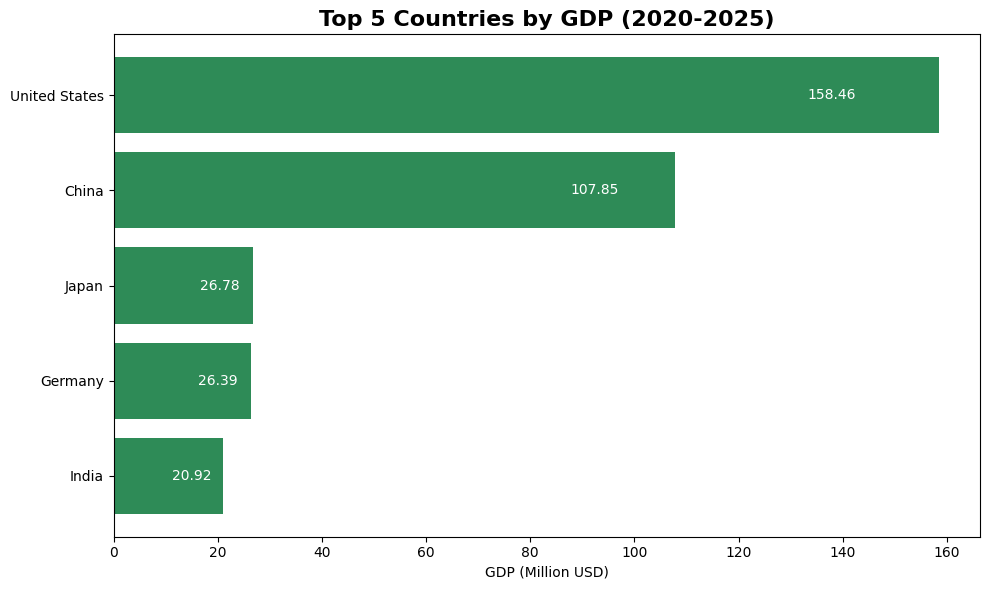

In [69]:
# Top 5 countries by GDP
top5_countries = (
    df_long[['Country', 'GDP']]
    .groupby('Country', as_index=False)
    .sum()
    .nlargest(5, 'GDP')
)

# Convert to millions
top5_countries['GDP_Million'] = top5_countries['GDP'] / 1e6

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_countries['Country'], top5_countries['GDP_Million'], color='#2E8B57')

# Reverse order
plt.gca().invert_yaxis()

# Add text labels *inside* bars or just next to them
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - (width * 0.1) if width > 10 else width + 0.1  # smart placement
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}",
             va='center', ha='right' if width > 10 else 'left', color='white' if width > 10 else 'black', fontsize=10)

plt.title("Top 5 Countries by GDP (2020-2025)", fontsize=16, weight='bold')
plt.xlabel("GDP (Million USD)")
plt.tight_layout()
plt.show()


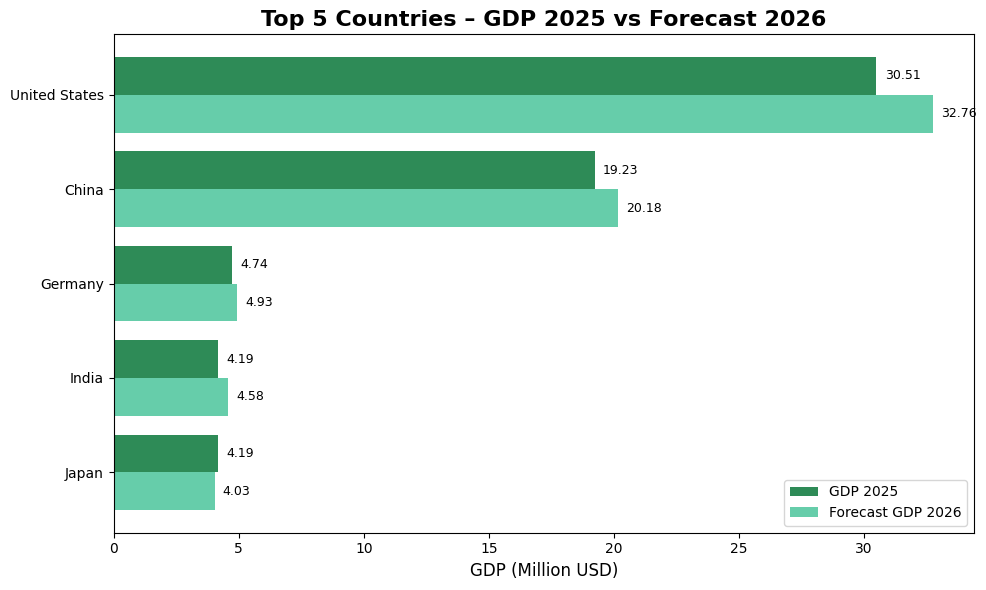

In [82]:
# --- Prepare data ---
df_2025 = df_long[df_long['Year'] == 2025][['Country', 'GDP', 'Forecasted_GDP_2026']].copy()
df_2025.rename(columns={'GDP': 'GDP_2025', 'Forecasted_GDP_2026': 'GDP_2026'}, inplace=True)

# Convert to millions
df_2025['GDP_2025_B'] = df_2025['GDP_2025'] / 1e6
df_2025['GDP_2026_B'] = df_2025['GDP_2026'] / 1e6

# Pick top 5 by 2025 GDP
top5 = df_2025.nlargest(5, 'GDP_2025_B')

# --- Plot ---
countries = top5['Country']
y_pos = np.arange(len(countries))
bar_height = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Bars
bars1 = ax.barh(y_pos - bar_height/2, top5['GDP_2025_B'], height=bar_height, color='#2E8B57', label='GDP 2025')
bars2 = ax.barh(y_pos + bar_height/2, top5['GDP_2026_B'], height=bar_height, color='#66CDAA', label='Forecast GDP 2026')

# Improved labels — dynamically positioned near bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        xpos = width + (0.01 * top5['GDP_2026_B'].max())  # small offset right of bar
        ax.text(xpos, bar.get_y() + bar.get_height()/2,
                f"{width:,.2f}",
                va='center', ha='left', fontsize=9, color='black')

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()
ax.set_xlabel("GDP (Million USD)", fontsize=12)
ax.set_title("Top 5 Countries – GDP 2025 vs Forecast 2026", fontsize=16, weight='bold')
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\Govind Krishnan\AppData\Local\Temp\ipykernel_32392\1758843469.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


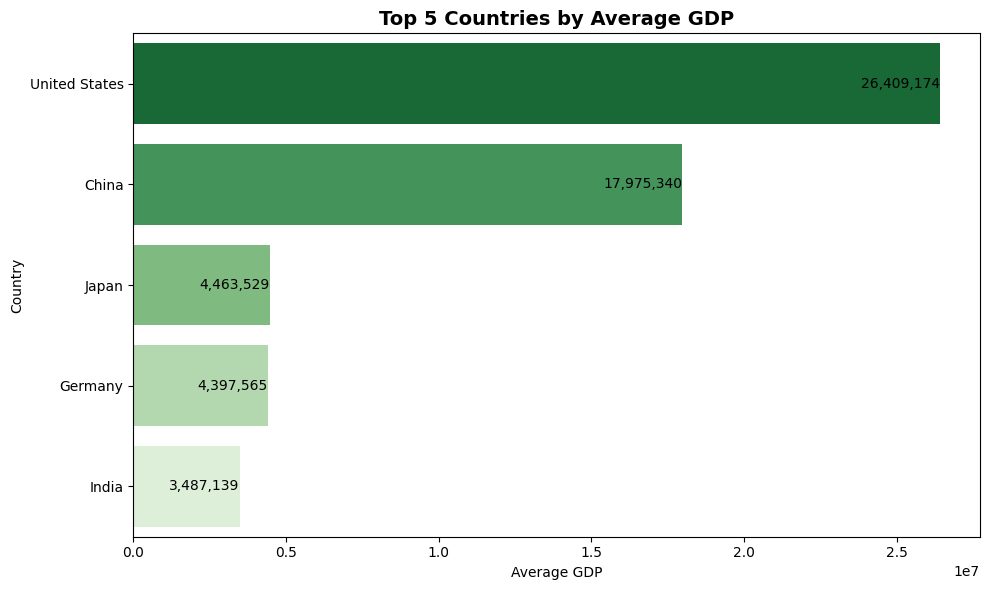

In [76]:
# Assuming df_long is your dataframe
top5_countries = (
    df_long[['Country', 'Average GDP']]
    .drop_duplicates()
    .nlargest(5, 'Average GDP')
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_countries,
    y='Country',
    x='Average GDP',
    palette='Greens_r'
)

# Add value labels
for i, val in enumerate(top5_countries['Average GDP']):
    plt.text(val, i, f"{val:,.0f}", va='center', ha='right', fontsize=10)


# Titles and labels
plt.title('Top 5 Countries by Average GDP', fontsize=14, weight='bold')
plt.xlabel('Average GDP')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


C:\Users\Govind Krishnan\AppData\Local\Temp\ipykernel_32392\2256477382.py:63: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Govind Krishnan\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


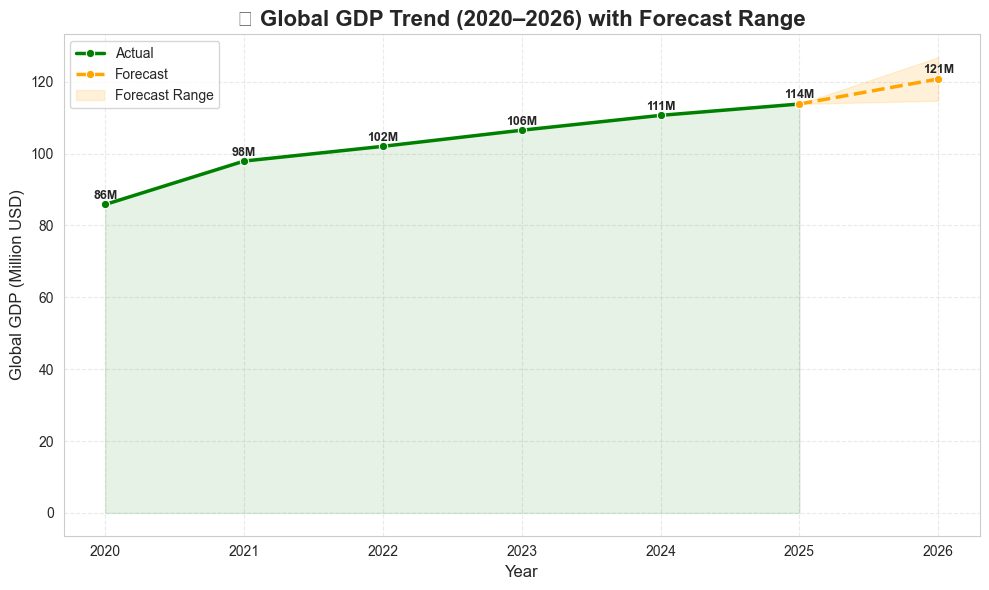

In [88]:
global_gdp = df_long.groupby('Year', as_index=False)['GDP'].sum()

forecast_2026 = df_long.groupby('Country')['Forecasted_GDP_2026'].first().sum()

forecast_row = pd.DataFrame({'Year': [2026], 'GDP': [forecast_2026]})
global_gdp = pd.concat([global_gdp, forecast_row], ignore_index=True)

global_gdp['GDP_M'] = global_gdp['GDP'] / 1e6

forecast_val = global_gdp.loc[global_gdp['Year'] == 2026, 'GDP_M'].values[0]
last_actual = global_gdp.loc[global_gdp['Year'] == 2025, 'GDP_M'].values[0]
lower_2026 = forecast_val * 0.95
upper_2026 = forecast_val * 1.05

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(
    data=global_gdp[global_gdp['Year'] <= 2025],
    x='Year', y='GDP_M', color='green', linewidth=2.5, marker='o', label='Actual'
)

sns.lineplot(
    data=global_gdp[global_gdp['Year'] >= 2025],
    x='Year', y='GDP_M', color='orange', linewidth=2.5, linestyle='--', marker='o', label='Forecast'
)

# Confidence band
plt.fill_between([2025, 2026],
                 [last_actual, lower_2026],
                 [last_actual, upper_2026],
                 color='orange', alpha=0.15, label='Forecast Range')

# Fill under actual GDP
plt.fill_between(global_gdp[global_gdp['Year'] <= 2025]['Year'],
                 global_gdp[global_gdp['Year'] <= 2025]['GDP_M'],
                 color='green', alpha=0.1)

# --- Annotate values ---
offset = (global_gdp['GDP_M'].max() - global_gdp['GDP_M'].min()) * 0.02  # dynamic offset
for _, row in global_gdp.iterrows():
    plt.text(row['Year'], row['GDP_M'] + offset,
             f"{row['GDP_M']:.0f}M",
             ha='center', va='bottom', fontsize=9, weight='bold')

# --- Formatting ---
plt.title("🌍 Global GDP Trend (2020–2026) with Forecast Range", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Global GDP (Million USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()
